## Machine Learning

### what is machine learning?

> **Machine learning** is a type of **artificial intelligence (AI)** that provides computers 
> with the ability **to learn without being explicitly programmed**. 
> Machine learning focuses on the development of computer programs that **can change when exposed to new data**.

---

### How machine learning diffrent from rules based system?
---

In [3]:
# lets detect ham/spam emails
def detect_spam(lst,word):
    return word in lst

In [6]:
spam_words1 = ['This isn’t a scam',
               '$$$',
               'Risk free']
print detect_spam(spam_words1,'$$$')
print detect_spam(spam_words1,'Nirmal')

True
False


In [8]:
#Extra income
spam_words2 = ['This isn’t a scam',
               '$$$',
               'Risk free',
               'Extra income']
print detect_spam(spam_words2,'Extra income')
print detect_spam(spam_words2,'Nirmal')

True
False


---
* What happens if i just see **part of the word**? eg: Risk or isn't scam
* How to weigh words i **have never seen so far**?

---
### Terms in Machine learning


* **Train Data** - Data used to train the machine learning model
* **Test Data** - Data used to test machine learning model
* **Accuracy** - The rate of correct predections by the model (80% accuracy is good)
---

---
### Diffrent types of machine learning?

---
* Supervised Learning
* Unsupervised Learning
---

### Supervised Machine Learning

> Supervised learning is the machine learning task of inferring a function from **labeled training data.** 

#### Demo- Supervised Machine Learning- Linear regression

> Least Square “Linear Regression” is a statistical method to regress the data 
with dependent variable having continuous values whereas independent 
variables can have either continuous or categorical values. 
In other words “Linear Regression” is a method to predict 
dependent variable (Y) based on values of independent variables (X). 

![ds](./linear-regression.gif)

In [9]:
# libraries

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model


In [22]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


In [11]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [12]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [13]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [14]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

('Coefficients: \n', array([ 938.23786125]))
Mean squared error: 2548.07
Variance score: 0.47


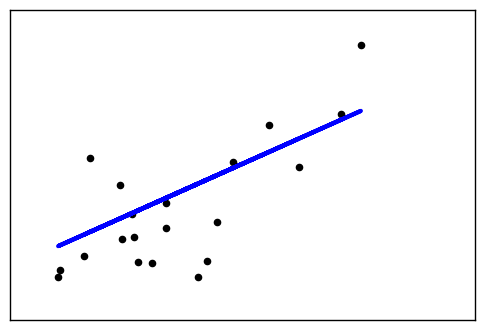

In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Un-supervised Machine Learning

> Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data **without labeled responses.** 

#### Kmeans- Unsupervised Machine learning

> k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

![ds](./kmeans.gif)

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [17]:
np.random.seed(5)

In [18]:
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

In [19]:
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

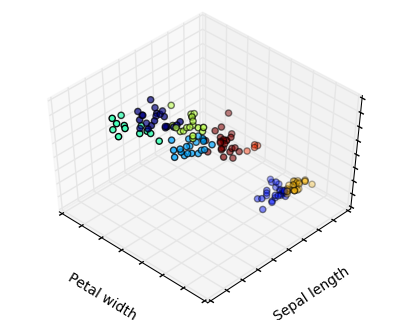

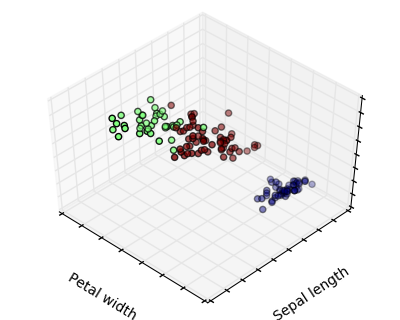

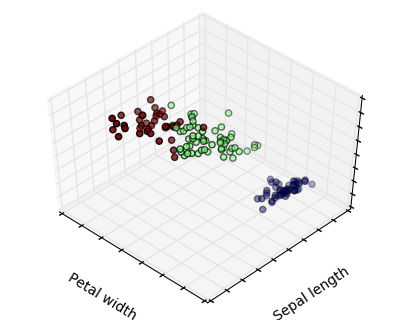

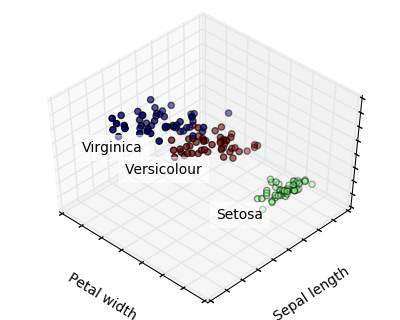

In [20]:
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

---
### Places where machine learning fails?
---

* Insufficient data
* Noise in Data

---

### Questions